# Text Preprocessing

In [21]:
# library
# !pip install nltk
# !pip install sastrawi

import string
import re

### Case folding
Case folding adalah langkah sederhana pada pra-pemrosesan teks yang bertujuan untuk mengubah semua huruf dalam dokumen teks menjadi huruf kecil. Tujuannya adalah membuat teks lebih seragam dan memudahkan proses analisis teks, terutama dalam pengenalan kata-kata yang sama meskipun berbeda penulisan huruf besar-kecil.

In [2]:
# example
source_text = "You were never mine. But I am always yours."
cf_text = source_text.lower()

print("Sumber Text  : {}".format(source_text))
print("Case folding : {}".format(cf_text))

Sumber Text  : You were never mine. But I am always yours.
Case folding : you were never mine. but i am always yours.


### Removal Special Characters
Dalam pemrosesan teks, seringkali kita perlu membersihkan teks dari karakter khusus yang tidak diinginkan, seperti angka, tanda baca, simbol, atau karakter khusus lainnya. Langkah ini penting untuk mempersiapkan teks agar sesuai dengan kebutuhan analisis atau pemrosesan selanjutnya.

##### number

In [17]:
def numberRemove (text):
    return ''.join([char for char in text if not char.isdigit()])

text = "I already 24 years old."
newText = numberRemove(text)

print("Sumber Text   : {}".format(text))
print("Number remove : {}".format(newText))

Sumber Text   : I already 24 years old.
Number remove : I already  years old.


In [20]:
# regex => unutk mempertahankan angka penting
# https://regex101.com
def hapus_angka_tidak_relevan(teks):
    # Menggunakan regex untuk mengidentifikasi dan menghapus angka yang tidak relevan
    # Pola untuk mengenali angka yang harus dihapus, termasuk nomor rumah dan nomor telepon
    pola_angka_tidak_relevan = r"\b(?:\d{1,3}[-\.\s]?)?(?:\d{3}[-\.\s]?)?\d{4,}\b"
    hasil = re.sub(pola_angka_tidak_relevan, "", teks)
    return hasil.strip()
 
# Contoh kalimat dengan angka
kalimat = "Di sini ada beberapa nomor rumah yaitu  123, 456, dan 789. Silakan hubungi 081234567890 untuk informasi lebih lanjut."
 
# Memanggil fungsi untuk menghapus angka tidak relevan
hasil_tanpa_angka = hapus_angka_tidak_relevan(kalimat)
 
# Menampilkan hasil
print("Sumber text :", kalimat)
print("Regex output:", hasil_tanpa_angka)

Sumber text : Di sini ada beberapa nomor rumah yaitu  123, 456, dan 789. Silakan hubungi 081234567890 untuk informasi lebih lanjut.
Regex output: Di sini ada beberapa nomor rumah yaitu  123, 456, dan 789. Silakan hubungi  untuk informasi lebih lanjut.


##### punctuation / tanda baca

In [23]:
def remove_punctuation(text):
    # Membuat set yang berisi semua tanda baca
    punctuation_set = set(string.punctuation)
 
    # Menghapus tanda baca dari teks
    text_without_punctuation = ''.join(char for char in text if char not in punctuation_set)
 
    return text_without_punctuation
 
# Contoh teks dengan tanda baca
teks_asli = "Ini adalah contoh teks, dengan tanda baca! Contoh ini, digunakan? untuk demonstrasi."
 
# Menghapus tanda baca dari teks
teks_tanpa_tanda_baca = remove_punctuation(teks_asli)
 
# Menampilkan hasil
print("input text  :", teks_asli)
print("output text :", teks_tanpa_tanda_baca)

input text  : Ini adalah contoh teks, dengan tanda baca! Contoh ini, digunakan? untuk demonstrasi.
output text : Ini adalah contoh teks dengan tanda baca Contoh ini digunakan untuk demonstrasi


##### whitespace

In [25]:
# strip() => remove whitespace in opening and ending text
teks = "   Ini adalah contoh kalimat dengan spasi di awal dan akhir.    "
teks_setelah_strip = teks.strip()
print(teks)
print(teks_setelah_strip)

   Ini adalah contoh kalimat dengan spasi di awal dan akhir.    
Ini adalah contoh kalimat dengan spasi di awal dan akhir.


In [30]:
# replace() => replacing every whitespace with ""
teks_dengan_whitespace = "Ini adalah    contoh kalimat    dengan spasi    di dalamnya."
teks_tanpa_whitespace = teks_dengan_whitespace.replace(" ", "")
print(teks_dengan_whitespace)
print(teks_tanpa_whitespace)

Ini adalah    contoh kalimat    dengan spasi    di dalamnya.
Iniadalahcontohkalimatdenganspasididalamnya.


### Stopword Removal
Penghapusan stopwords adalah langkah penting dalam pra-pemrosesan teks pada NLP. Stopwords adalah kata-kata umum yang sering muncul pada teks, tetapi tidak memiliki nilai informatif tinggi dalam analisis teks. Contohnya adalah kata-kata seperti "dan", "di", "ke", "yang", dan sebagainya.

##### nltk

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [35]:
# Download korpus stopwords bahasa Indonesia dari NLTK jika belum terunduh
nltk.download('stopwords')
nltk.download('punkt')  # Untuk tokenisasi kata

[nltk_data] Downloading package stopwords to /home/yelf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yelf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
teks = "Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan."
print(teks)

Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan.


In [40]:
# Tokenisasi teks menjadi kata-kata
tokens_kata = word_tokenize(teks)
print(tokens_kata)

['Perekonomian', 'Indonesia', 'sedang', 'dalam', 'pertumbuhan', 'yang', 'membanggakan', '.']


In [41]:
# Ambil daftar stopwords bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words('indonesian'))
print(stopwords_indonesia)

{'begitupun', 'sepantasnya', 'bolehkah', 'pada', 'diucapkannya', 'sekali-kali', 'perlukah', 'menanti-nanti', 'dituturkannya', 'seingat', 'paling', 'padahal', 'kan', 'tentu', 'cukuplah', 'belumlah', 'disebut', 'sini', 'agar', 'terlihat', 'diketahui', 'seketika', 'entah', 'menjawab', 'keadaan', 'sedangkan', 'tapi', 'sedang', 'wah', 'dia', 'menambahkan', 'sudah', 'mengingat', 'belum', 'kembali', 'diperlihatkan', 'bakalan', 'naik', 'maupun', 'diberi', 'dapat', 'beri', 'berikut', 'sebegini', 'kata', 'dan', 'jawaban', 'meski', 'akankah', 'bahwasanya', 'suatu', 'semisalnya', 'inikah', 'semisal', 'menjelaskan', 'sedikitnya', 'dibuat', 'keduanya', 'tengah', 'tidak', 'terjadinya', 'bermaksud', 'masing-masing', 'boleh', 'adanya', 'guna', 'tegas', 'menyiapkan', 'pernah', 'mengakhiri', 'sesudahnya', 'pukul', 'semua', 'dimaksudkan', 'datang', 'kiranya', 'begitu', 'berlalu', 'inginkan', 'benarkah', 'betulkah', 'kasus', 'terlalu', 'melihat', 'mengenai', 'sementara', 'setinggi', 'mungkinkah', 'sepertin

In [42]:
# Filtering kata-kata dengan menghapus stopwords
kata_penting = [kata for kata in tokens_kata if kata.lower() not in stopwords_indonesia]
print(kata_penting)

['Perekonomian', 'Indonesia', 'pertumbuhan', 'membanggakan', '.']


In [43]:
# Gabungkan kata-kata penting kembali menjadi teks
teks_tanpa_stopwords = ' '.join(kata_penting)
print(teks_tanpa_stopwords)

Perekonomian Indonesia pertumbuhan membanggakan .


##### sastrawi

In [44]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

In [54]:
# Inisialisasi objek StopWordRemover dari Sastrawi
factory = StopWordRemoverFactory()
stopwords_sastrawi = factory.get_stop_words()
print(dir(factory))
print("Stopword list : {}".format(stopwords_sastrawi))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'create_stop_word_remover', 'get_stop_words']
Stopword list : ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'ma

In [56]:
teks = "Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan."
print(teks)

Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan.


In [57]:
# Tokenisasi teks menjadi kata-kata
tokens_kata = word_tokenize(teks)
print(tokens_kata)

['Perekonomian', 'Indonesia', 'sedang', 'dalam', 'pertumbuhan', 'yang', 'membanggakan', '.']


In [58]:
# Filtering kata-kata dengan menghapus stopwords Sastrawi
kata_penting = [kata for kata in tokens_kata if kata.lower() not in stopwords_sastrawi]
print(kata_penting)

['Perekonomian', 'Indonesia', 'sedang', 'pertumbuhan', 'membanggakan', '.']


In [59]:
# Gabungkan kata-kata penting kembali menjadi teks
teks_tanpa_stopwords = ' '.join(kata_penting)
print(teks_tanpa_stopwords)

Perekonomian Indonesia sedang pertumbuhan membanggakan .


### Tokenizing
Tokenisasi (tokenizing) adalah proses membagi teks menjadi potongan-potongan lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau entitas lain yang lebih kecil dari teks yang dianalisis. Tujuan tokenisasi adalah memecah teks menjadi unit-unit yang lebih mudah diolah atau diinterpretasi dalam analisis teks atau pemrosesan bahasa alami.

##### Tokenisasi Kata (Word Tokenization)

In [61]:
from nltk.tokenize import word_tokenize
 
text = "Ini adalah contoh tokenisasi kata dalam pemrosesan teks."
tokens = word_tokenize(text)
print(text)
print(tokens)

Ini adalah contoh tokenisasi kata dalam pemrosesan teks.
['Ini', 'adalah', 'contoh', 'tokenisasi', 'kata', 'dalam', 'pemrosesan', 'teks', '.']


##### Tokenisasi Kalimat (Sentence Tokenization)

In [62]:
from nltk.tokenize import sent_tokenize
 
text = "Ini adalah contoh tokenisasi kalimat. Apakah ini kalimat kedua? Ya, ini kalimat ketiga!"
sentences = sent_tokenize(text)
print(text)
print(sentences)

Ini adalah contoh tokenisasi kalimat. Apakah ini kalimat kedua? Ya, ini kalimat ketiga!
['Ini adalah contoh tokenisasi kalimat.', 'Apakah ini kalimat kedua?', 'Ya, ini kalimat ketiga!']


##### Tokenisasi Frasa (Phrase Tokenization)

In [97]:
# Misalkan kita ingin memisahkan frasa berdasarkan tanda baca koma (,)
text = "Apel, jeruk, pisang, dan mangga."
# phrases = text.split(',')
# phrases = [x.strip() for x in phrases]
phrases = [text.strip() for text in text.split(",")]
print(text)
print(phrases)

Apel, jeruk, pisang, dan mangga.
['Apel', 'jeruk', 'pisang', 'dan mangga.']


##### Tokenisasi Berdasarkan Aturan (Rule-based Tokenization)
Menggunakan aturan linguistik atau aturan pemrosesan teks untuk membagi teks menjadi token. Contohnya termasuk tokenisasi khusus untuk URL, email, atau entitas tertentu.

In [65]:
# Contoh aturan tokenisasi khusus untuk tokenisasi kata dalam bahasa Indonesia
import re
 
text = "Pertama, kita perlu menyiapkan bahan-bahan yang diperlukan."
tokens = re.findall(r'\w+|\d+', text)
print(tokens)

['Pertama', 'kita', 'perlu', 'menyiapkan', 'bahan', 'bahan', 'yang', 'diperlukan']


##### Tokenisasi Berdasarkan Model (Model-based Tokenization)
Menggunakan model statistik atau model bahasa untuk memprediksi token dalam teks. Contohnya termasuk tokenisasi berbasis mesin pembelajaran, seperti model pembelajaran berbasis Transformer.

In [66]:
# Misalnya menggunakan spasi sebagai pemisah kata
text = "Ini adalah contoh tokenisasi berbasis model."
tokens = text.split()
print(tokens)

['Ini', 'adalah', 'contoh', 'tokenisasi', 'berbasis', 'model.']


### Stemming
Stemming adalah sebuah proses dalam bidang pemrosesan teks yang digunakan untuk menyederhanakan kata-kata ke bentuk dasarnya dengan cara menghilangkan awal ataupun akhiran kata. Tujuannya adalah agar kata-kata berbeda, tetapi berasal dari satu kata dasar, dapat direduksi menjadi bentuk yang lebih seragam.

Algoritma stemming, seperti Porter, Snowball, dan Lancaster menggunakan aturan-aturan sederhana untuk melakukan pemotongan pada kata-kata sehingga kita dapat mengelompokkan variasi kata yang mirip dalam bentuk dasar yang lebih umum. 

In [70]:
import nltk
from nltk.stem import PorterStemmer
 
# Inisialisasi stemmer
stemmer = PorterStemmer()
 
# Kata-kata asli
words = ["running", "runs", "runner", "ran", "easily", "fairness", "better", "best", "cats", "cacti", "geese", "rocks", "oxen"]
 
# Melakukan stemming pada setiap kata
for word in words:
    # stemmed_word = PorterStemmer().stem(word)
    stemmed_word = stemmer.stem(word)
    print(f"{word} => {stemmed_word}")

running => run
runs => run
runner => runner
ran => ran
easily => easili
fairness => fair
better => better
best => best
cats => cat
cacti => cacti
geese => gees
rocks => rock
oxen => oxen


### lemmatizaion
Lemmatization adalah sebuah teknik dalam pemrosesan teks untuk mengubah kata-kata ke bentuk dasar mereka, yang disebut lemma (atau lema). Tujuannya adalah menyatukan kata-kata dengan akar sama agar dapat direpresentasikan melalui satu bentuk dasar yang merepresentasikan makna kata tersebut secara tepat.

In [115]:
import nltk
from nltk.stem import WordNetLemmatizer
 
# Download wordnet jika belum di-download
nltk.download('wordnet')
from nltk.corpus import wordnet
 
# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()
 
# Kata-kata asli
# words = ["running", "easily", "bought", "crying", "leaves"]
words = ["improve", "improving", "improvements", "improved", "improver"]
 
# Melakukan lematisasi pada setiap kata
for word in words:
    lemma_word = lemmatizer.lemmatize(word.lower(), pos=wordnet.VERB)  # Mengonversi ke huruf kecil untuk memastikan pemrosesan yang konsisten
    print(f"Kata asli: {word}, Kata setelah lematisasi: {lemma_word}")

# lemmatized_words = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in words]
# print(lemmatized_words)

Kata asli: improve, Kata setelah lematisasi: improve
Kata asli: improving, Kata setelah lematisasi: improve
Kata asli: improvements, Kata setelah lematisasi: improvements
Kata asli: improved, Kata setelah lematisasi: improve
Kata asli: improver, Kata setelah lematisasi: improver


[nltk_data] Downloading package wordnet to /home/yelf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Perbedaan utama antara lemmatization dan stemming adalah lemmatization lebih cermat karena mempertimbangkan aturan morfologi bahasa. Misalnya, lemmatization akan mengubah kata-kata seperti "studies", "studying" menjadi bentuk dasar "study", sementara stemming hanya memotong akhiran kata tanpa memperhatikan makna menjadi "studi" dan "study".
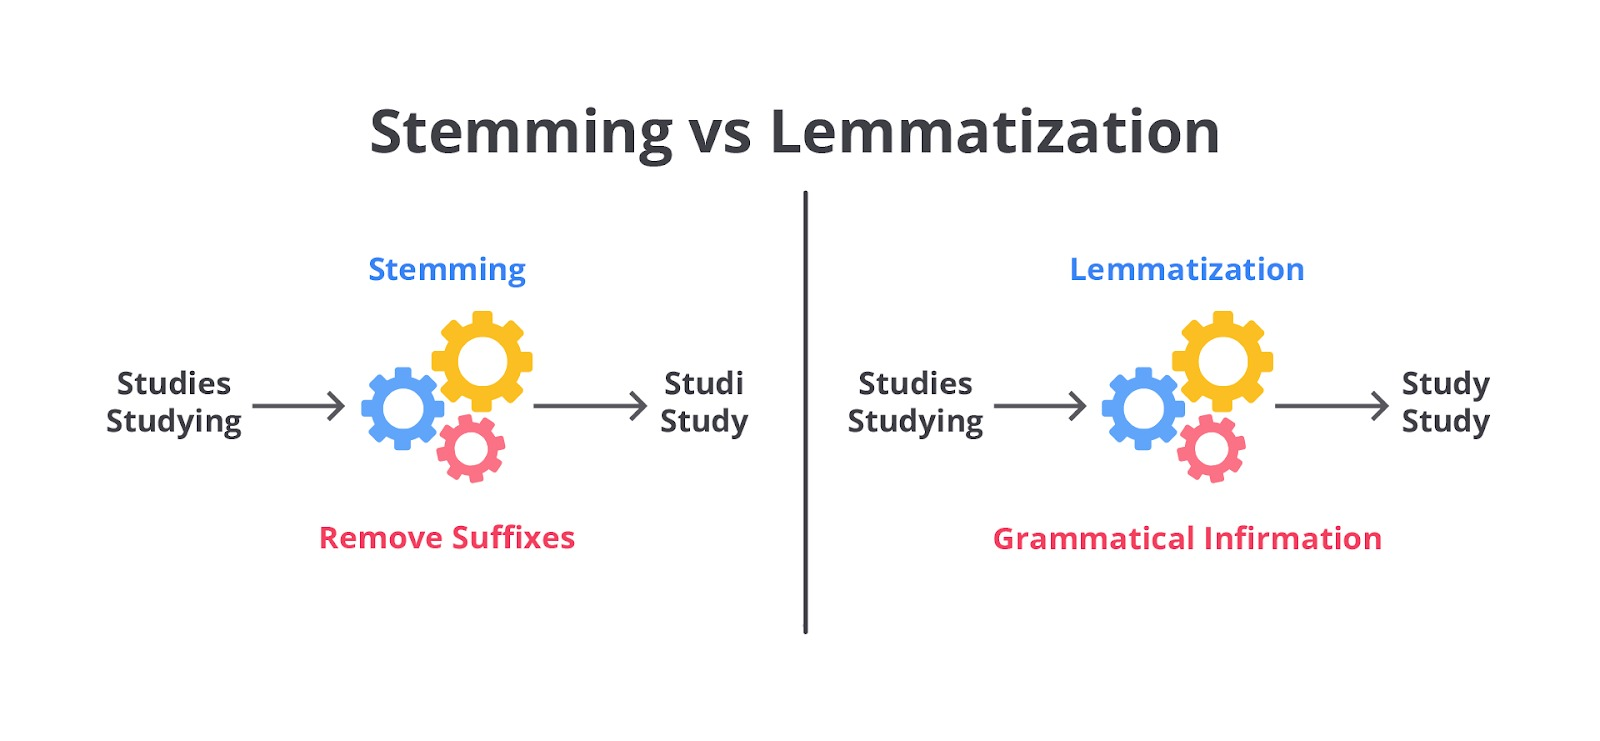